#### Predicting Customer Behavior

The business problem behind this project involves predicting customer behavior based on the options chosen during the booking process and determining whether they successfully completed the booking.

A dataset was provided, and to solve the problem, the following steps were taken:
- **Exploratory Data Analysis (EDA):** The dataset underwent EDA to identify key features and patterns.
- **Visualization:** Visualizations were created to understand the distribution of bookings.
- **Data Preparation:** The data was trained and preprocessed through encoding to prepare it for model deployment.
- **Model Deployment:** A tree-based model, specifically a Random Forest, was deployed.
- **Model Evaluation:** The model was evaluated, and output visualizations were generated to identify the most important factors affecting booking completion.
- **Presentation:** Visuals and key insights were presented on a separate presentation slide.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [10]:

import os
print(os.getcwd())

C:\Users\Krishnan Srinivas\BAcustomerbehaviour


In [3]:
#uploading and reading the file
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
#seeing the last few rows 
df.tail()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0
49999,1,Internet,RoundTrip,19,6,10,Thu,PERPNH,Australia,0,1,0,5.62,0


### Exploratory Data Analysis (EDA)

- **Column Identification:**
  - Identify the columns in the dataset.
  - Obtain descriptive statistics.

- **Data Mapping:**
  - Map the days of the week into numerical values.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

Obtaining values from the flight_day column and mapping it into integer values in order to parse the data in the model

In [7]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [9]:

mapping = { "Mon":1, "Tue":2, "Wed":3, "Thu":4, "Fri":5, "Sat":6, "Sun":7}
df["flight_day"] = df["flight_day"].map(mapping)

In [11]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [13]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


### Data Visualization

Since there is a target variable (**booking complete**) with binary values (0 and 1), it is considered as a classification problem. Therefore, a pie chart is created to visualize the distribution between completed bookings and those that were not completed.

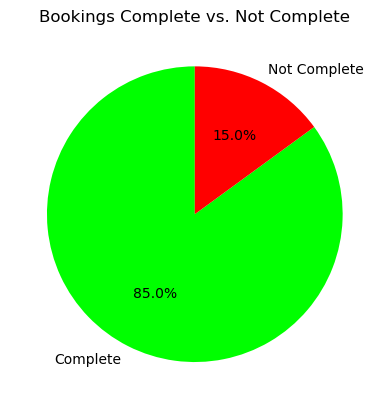

In [110]:
booking_counts = df['booking_complete'].value_counts()

labels= 'Complete','Not Complete'
colors = ['#00FF00','#FF0000']
plt.pie(booking_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Bookings Complete vs. Not Complete')
plt.show()

### Preparing the Data for Modelling

1) **Exploration**
   -check null values and understand the shape of the data
   -Identify columns with object data type
3) **Encoding**
   -Encode object columns into order to be parsed into the model

In [15]:

df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [17]:
df.shape

(50000, 14)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

### Splitting the Dataset into Training and Testing

Before carrying out any preprocessing steps, the dataset will be split into training and testing to prevent dataleakage and potential overfitting

In [39]:
#Splitting the data into training and testing
from sklearn.model_selection import train_test_split

X= df.drop(columns=["booking_complete"])
y = df["booking_complete"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

### Data Encoding Strategy

**1. Low Cardinality Features:**
   - **Sales_channel** and **trip_type** have low cardinality (only 2 or 3 unique values).
   - These will undergo **OneHot Encoding**, where each unique value will have a separate column, and each row will contain either 0 or 1.

**2. High Cardinality Features:**
   - **Route** and **booking_origin** have high cardinality (a large number of unique values).
   - These will undergo **frequency encoding** because OneHot Encoding might create too many columns, increasing the dimensionality and complexity of the dataset.


In [114]:
print(df["sales_channel"].unique())
print(df["trip_type"].unique())
print(df["route"].unique())
print(df["booking_origin"].unique())

['Internet' 'Mobile']
['RoundTrip' 'CircleTrip' 'OneWay']
['AKLDEL' 'AKLHGH' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG' 'AKLTPE' 'AORICN' 'AORKIX' 'AORKTM' 'AORMEL' 'BBIMEL'
 'BBIOOL' 'BBIPER' 'BBISYD' 'BDOCTS' 'BDOCTU' 'BDOHGH' 'BDOICN' 'BDOIKA'
 'BDOKIX' 'BDOMEL' 'BDOOOL' 'BDOPEK' 'BDOPER' 'BDOPUS' 'BDOPVG' 'BDOSYD'
 'BDOTPE' 'BDOXIY' 'BKICKG' 'BKICTS' 'BKICTU' 'BKIHND' 'BKIICN' 'BKIKIX'
 'BKIKTM' 'BKIMEL' 'BKIMRU' 'BKIOOL' 'BKIPEK' 'BKIPER' 'BKIPUS' 'BKIPVG'
 'BKISYD' 'BKIXIY' 'BLRICN' 'BLRMEL' 'BLRPER' 'BLRSYD' 'BOMMEL' 'BOMOOL'
 'BOMPER' 'BOMSYD' 'BTJJED' 'BTUICN' 'BTUPER' 'BTUSYD' 'BTUWUH' 'BWNCKG'
 'BWNDEL' 'BWNHGH' 'BWNIKA' 'BWNKTM' 'BWNMEL' 'BWNOOL' 'BWNPER' 'BWNSYD'
 'BWNTPE' 'CANDEL' 'CANIKA' 'CANMEL' 'CANMRU' 'CANOOL' 'CANPER' 'CANSYD'
 'CCUMEL' 'CCUMRU' 'CCUOOL' 'CCUPER' 'CCUSYD' 'CCUTPE' 'CEBMEL' 'CEBOOL'
 'CEBPER' 'CEBSYD' 'CGKCKG' 'CGKCTS' 'CGKCTU' 'CGKDEL' 'CGKHGH' 'CGKHND'
 'CGKICN' 'CGKIKA' 'CGKJED' 'CGKKIX' 'CGKKTM' 'CGKMEL' 'CGKMRU' 'C

In [37]:
#List of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['sales_channel', 'trip_type', 'route', 'booking_origin']


In [41]:
X_train.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration'],
      dtype='object')

In [43]:
#Applying one hot encoding for low cardinality object columns- sales channel, trip type
from sklearn.preprocessing import OneHotEncoder

low_cardinality_cols = ['sales_channel', 'trip_type']

ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
OH_cols_train =pd.DataFrame(ohe.fit_transform(X_train[low_cardinality_cols]))
OH_cols_valid =pd.DataFrame(ohe.transform(X_valid[low_cardinality_cols]))

OH_cols_train.columns = ohe.get_feature_names_out(low_cardinality_cols)
OH_cols_valid.columns = ohe.get_feature_names_out(low_cardinality_cols)

OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

num_X_train = X_train.drop(low_cardinality_cols, axis=1)
num_X_valid = X_valid.drop(low_cardinality_cols, axis=1)

X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

X_train.columns = X_train.columns.astype(str)
X_valid.columns = X_valid.columns.astype(str)

In [51]:
#Frequency encoding for high cardinality columns

high_cardinality_cols = ['route', 'booking_origin']
freq_encodings = {}

#Frequency encoding on training set
for col in high_cardinality_cols:
    freq_encoding = X_train[col].value_counts(normalize=True)
    freq_encodings[col] = freq_encoding
    X_train[col + '_encoded'] = X_train[col].map(freq_encoding).copy()

#Frequency encoding on validation set
for col in high_cardinality_cols:
    X_valid[col + '_encoded']= X_valid[col].map(freq_encodings[col]).fillna(0).copy()

In [55]:
X_train.drop(high_cardinality_cols, axis=1, inplace=True)
X_valid.drop(high_cardinality_cols, axis=1, inplace=True)

In [57]:
X_valid.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'sales_channel_Mobile',
       'trip_type_OneWay', 'trip_type_RoundTrip', 'route_encoded',
       'booking_origin_encoded'],
      dtype='object')

In [59]:
X_train.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'sales_channel_Mobile',
       'trip_type_OneWay', 'trip_type_RoundTrip', 'route_encoded',
       'booking_origin_encoded'],
      dtype='object')

In [61]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 39087 to 15795
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_passengers          40000 non-null  int64  
 1   purchase_lead           40000 non-null  int64  
 2   length_of_stay          40000 non-null  int64  
 3   flight_hour             40000 non-null  int64  
 4   flight_day              40000 non-null  int64  
 5   wants_extra_baggage     40000 non-null  int64  
 6   wants_preferred_seat    40000 non-null  int64  
 7   wants_in_flight_meals   40000 non-null  int64  
 8   flight_duration         40000 non-null  float64
 9   sales_channel_Mobile    40000 non-null  float64
 10  trip_type_OneWay        40000 non-null  float64
 11  trip_type_RoundTrip     40000 non-null  float64
 12  route_encoded           40000 non-null  float64
 13  booking_origin_encoded  40000 non-null  float64
dtypes: float64(6), int64(8)
memory usage: 4

### Model Deployment

The **Random Forest Model**, a tree-based model, is being used because this is a classification problem and there are various features

In [63]:
#Random Forest Classifer since the target variable is a classification/categorical variable

from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)


### Model Evaluation

Since it is a classification problem metrics such as accuracy report, confusion matrix and a classification report will be obtained. 

The confusion matrix will be shown through a heat map 

There will also be a precision-recall curve

In [73]:
#Evaluating the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"accuracy score: {(accuracy_score(y_valid, y_pred))*100}") 
print("")
print("Classification Report:")
classification_report=classification_report(y_valid, y_pred)
print(classification_report)
print("")
print("Confusion Matrix:")
Confusion_Matrix=confusion_matrix(y_valid, y_pred)
print(Confusion_Matrix)


accuracy score: 85.58

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.57      0.10      0.18      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.54      0.55     10000
weighted avg       0.82      0.86      0.81     10000


Confusion Matrix:
[[8405  115]
 [1327  153]]


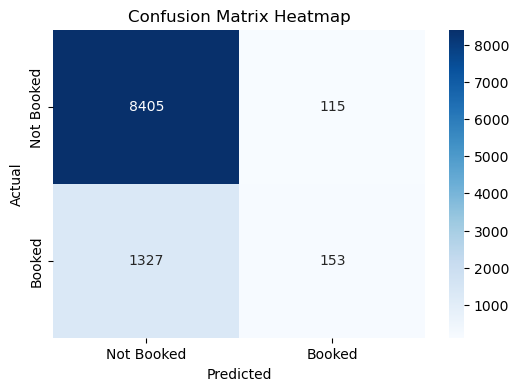

In [77]:
#Plotting Confusion Matrix

plt.figure(figsize=(6,4))
sns.heatmap(Confusion_Matrix, annot=True, fmt="d", cmap="Blues",xticklabels=["Not Booked","Booked"],yticklabels=["Not Booked", "Booked"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

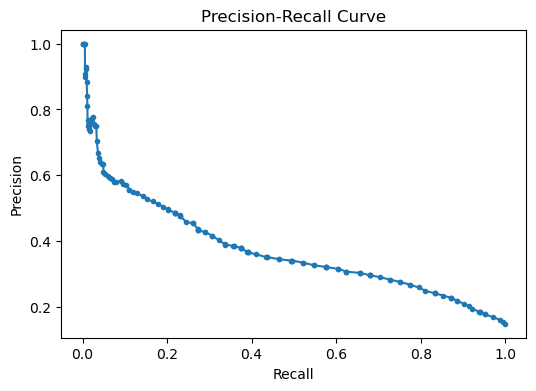

In [83]:
#Precision-Recall Curve, since the model struggles with recall

from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_valid, model.predict_proba(X_valid)[:,1])

plt.figure(figsize=(6,4))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### Output Visualisation

Feature importance is being plotted to identify the most important variables affecting whether the customer
decides to finally make the booking or not. 

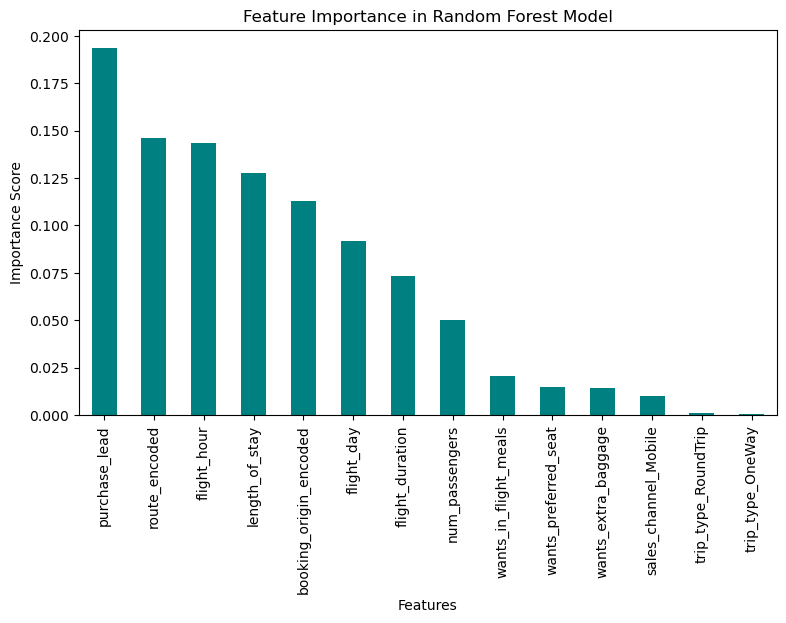

In [85]:
#Feature Importance in random Forest Model
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(9,5))
feature_importances.plot(kind="bar", color="teal")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Random Forest Model")
plt.show()